# MNIST 이미지 분류 
- MNIST 손글씨 숫자(0 ~ 9) 이미지
- 하나의 이미지는 28 * 28pixel 의 크기
- 6만개의 Train 이미지와 1만개의 Test 이미지로 구성됨.

In [1]:
from tensorflow import keras

In [3]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 758s 66us/step


In [4]:
train_image.shape, train_label.shape

((60000, 28, 28), (60000,))

In [5]:
test_image.shape, test_label.shape

((10000, 28, 28), (10000,))

In [6]:
type(train_image), type(train_label)

(numpy.ndarray, numpy.ndarray)

In [9]:
train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
import matplotlib.pyplot as plt

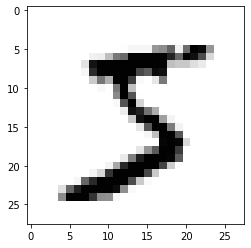

In [11]:
plt.imshow(train_image[0], cmap='Greys')
plt.show()

In [12]:
train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

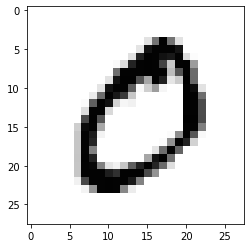

In [13]:
plt.imshow(train_image[1], cmap='Greys')
plt.show()

## 신경망 구현

## 모델(network) : 전체 모델 구조 만들기
- Layer를 쌓는 작업

In [14]:
from tensorflow.keras import layers, models

In [18]:
# 모델생성
model=models.Sequential()
# 모델에 Layer를 추가
model.add(layers.Dense(32, activation='relu', input_shape=(28*28,)))  # inputlayer: 첫번째 레이어 값을 입력받음, 노드(뉴런)을 32개 생성 
model.add(layers.Dense(32, activation='relu'))  # hidden layer: inputlayer와 outlayer사이에 숨겨져 있는 레이어들, input값(x)에 가중치(w)를 곱힌값을 이용하여 패턴을 찾음
model.add(layers.Dense(10, activation='softmax'))  # outlayer: 출력레이어, 마지막 layer로 값을 출력함

In [2]:
784*32+32  # 784: input값 개수, 32: 노드개수이자 편향개수, 784*32: 가중치개수

25120

In [19]:
model.summary()
# total params: 학습을 통해 fitting해야할 값들

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


## 컴파일 단계
- 구축된 모델에 추가 설정
    - 손실함수
    - Optimizer(최적화 함수)
    - 평가지표

In [52]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 데이터 준비
### X
- 28 by 28 행렬(2D 텐서) 형태의 이미지를 28*28 의 Vector(1d 텐서)로 변환
- 0 ~ 1 사이의 값으로 정규화 시킨다. 

### y
- one hot encoding 처리
    - Multi-class 분류의 경우
    - tensorflow.keras 의 to_categorical() 함수 이용

In [53]:
import numpy as np

### X 처리

In [54]:
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

In [55]:
X_train=train_image.reshape((60000, 28*28))
X_train=X_train/255

In [56]:
X_test=test_image.reshape((10000, 28*28))
X_test=X_test/255

In [57]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

### y값 처리
 - multi-class일 경우 => one hot encoding

In [58]:
from tensorflow.keras.utils import to_categorical

In [59]:
y_train=to_categorical(train_label)
y_test=to_categorical(test_label)

In [60]:
train_label.shape, y_train.shape

((60000,), (60000, 10))

In [61]:
train_label[0]

5

In [62]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 학습 (fit)


In [63]:
model.fit(X_train, y_train, epochs=20, batch_size=128)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0426 - accuracy: 0.9871
Epoch 2/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0396 - accuracy: 0.9877
Epoch 3/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0370 - accuracy: 0.9885
Epoch 4/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0346 - accuracy: 0.9899
Epoch 5/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0336 - accuracy: 0.9898
Epoch 6/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0314 - accuracy: 0.9903
Epoch 7/20
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0294 - accuracy: 0.9910
Epoch 8/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0280 - accuracy: 0.9917
Epoch 9/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0265 - accuracy: 0.9922
Epoch 10/20
60

## 테스트셋으로 모델 평가

In [64]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [65]:
test_loss, test_acc

(0.14915194449114277, 0.9683)

## 예측
- predict()
    - 각 클래스 별 확률 반환
- predict_class()
    - 클래스(범주값) 반환

In [45]:
y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

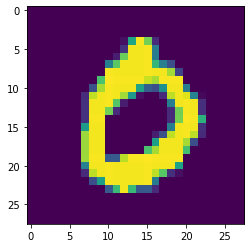

In [46]:
plt.imshow(test_image[3])

In [47]:
model.predict(X_test[3].reshape(1,-1))

array([[9.9911243e-01, 1.2924625e-10, 8.8305399e-04, 2.2725011e-07,
        1.8919908e-07, 6.1979517e-07, 1.0211486e-08, 3.1755533e-08,
        8.5309277e-12, 3.3920201e-06]], dtype=float32)

In [50]:
model.predict_classes(X_test[3].reshape(1,-1))

array([0], dtype=int64)